In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X = np.load("dataset/X.npy")
y = np.load("dataset/Y.npy")

X shape: (2062, 64, 64)
Y shape: (2062, 10)
Number of samples: 2062
Number of classes: 10


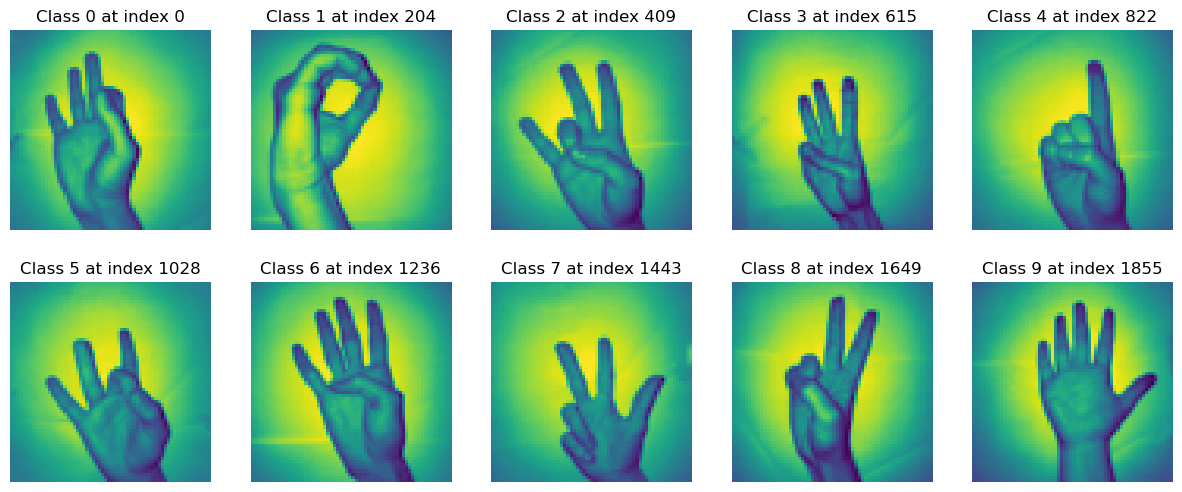

In [3]:
m = X.shape[0]
c = y.shape[1]
mydebug = False

print("X shape:", X.shape)
print("Y shape:", y.shape)
print("Number of samples:", m)
print("Number of classes:", c)

# get the first sample that appears in the y of every class
fig, axes = plt.subplots(math.ceil(c/5), 5, figsize=(15,6))
for i in range(c):
    _y = np.zeros((1, 10))
    _y[0][i] = 1
    for j in range(m):
        if np.array_equal(y[j], _y[0]):
            axes.flat[i].imshow(X[j])
            axes.flat[i].set_title(f"Class {i} at index {j}")
            axes.flat[i].axis("off")
            break
plt.show()


# One-vs-all Logistic Regression
The code used for the functions where given in class

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def costFunctionReg(X, y, theta, Lambda):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))

    return regCost[0], grad_all


In [6]:
def featureNormalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    x_norm = (X - mean) / std
    return x_norm, mean, std

In [7]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    J_history = []
    for i in range(num_iters):
        cost, grad = costFunctionReg(X, y, theta, Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
        if mydebug: print("\r\titer: ", i, "of", num_iters, end="")
    return theta, J_history

In [8]:
def oneVsAll(X, y, initial_theta, alpha, num_iters, Lambda, K):
    all_theta = []
    all_J=[]
    m=X.shape[0]
    n=X.shape[1]
    X = np.append(np.ones((m,1)), X, axis=1)
    for i in range(1,K+1):
        if mydebug: print("K(", i, "):")
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,alpha,num_iters,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
        if mydebug: print("")
    return np.array(all_theta).reshape(K,n+1), all_J

    

In [9]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.append(np.ones((m,1)), X, axis=1)
    predictions = np.dot(X, all_theta.T)
    return np.argmax(predictions, axis=1) + 1

In [10]:
# test function costFunctionReg
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t = np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.append(np.ones((5,1)), X_t, axis=1)
y_t = np.array([1,0,1,0,1]).reshape(5,1)
cost,grad = costFunctionReg(X_t, y_t, theta_t, 3)
print("Cost:", cost) # Cost: 2.535
print("Gradients:", *grad, sep=" ")
print("")
print("Theta:", *theta_t, sep=" ")
print("")
print("X", X_t.shape, ":")
print(X_t)
print("")
print("y", y_t.shape, ":")
print(y_t)

Cost: 2.534819396109744
Gradients: [0.14656137] [-0.54855841] [0.72472227] [1.39800296]

Theta: [-2] [-1] [1] [2]

X (5, 4) :
[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]

y (5, 1) :
[[1]
 [0]
 [1]
 [0]
 [1]]


### Calculate best learning rate

In [11]:
# transform the 2d images into 1d arrays
X1 = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
initial_theta = np.zeros((X1.shape[1]+1, 1))

# y is shaped in (m, K) and should be (m, 1) with the K value
y_t = np.argmax(y,axis=1).reshape(y.shape[0], 1) + 1

out = []
mydebug = False
for learning_rate in range(60, 200, 10):
    all_theta, all_J = oneVsAll(X1, y_t, initial_theta, 1/learning_rate, 10, learning_rate, 10)
    pred = predictOneVsAll(all_theta, X1).reshape(-1, 1)
    out += [sum(pred==y_t)[0]/y_t.shape[0]*100]
    print(learning_rate, " Pred: ", out[-1],"%", sep="")
plt.plot(range(60, 200, 10), out)


60 Pred: 38.26382153249273%
70 Pred: 41.7070805043647%
80 Pred: 57.22599418040737%
90 Pred: 51.50339476236664%
100 Pred: 56.20756547041707%


KeyboardInterrupt: 

### Train model with the best learning rate found

In [27]:
learning_rate = 110
mydebug = True
all_theta, all_J = oneVsAll(X1, y_t, initial_theta, 1/learning_rate, 1000, learning_rate, 10)
pred = predictOneVsAll(all_theta, X1).reshape(-1, 1)
out += [sum(pred==y_t)[0]/y_t.shape[0]*100]

K( 1 ):
	iter:  999 of 1000
K( 2 ):
	iter:  999 of 1000
K( 3 ):
	iter:  999 of 1000
K( 4 ):
	iter:  999 of 1000
K( 5 ):
	iter:  999 of 1000
K( 6 ):
	iter:  999 of 1000
K( 7 ):
	iter:  999 of 1000
K( 8 ):
	iter:  999 of 1000
K( 9 ):
	iter:  999 of 1000
K( 10 ):
	iter:  999 of 1000


110 Pred: 75.02424830261882%


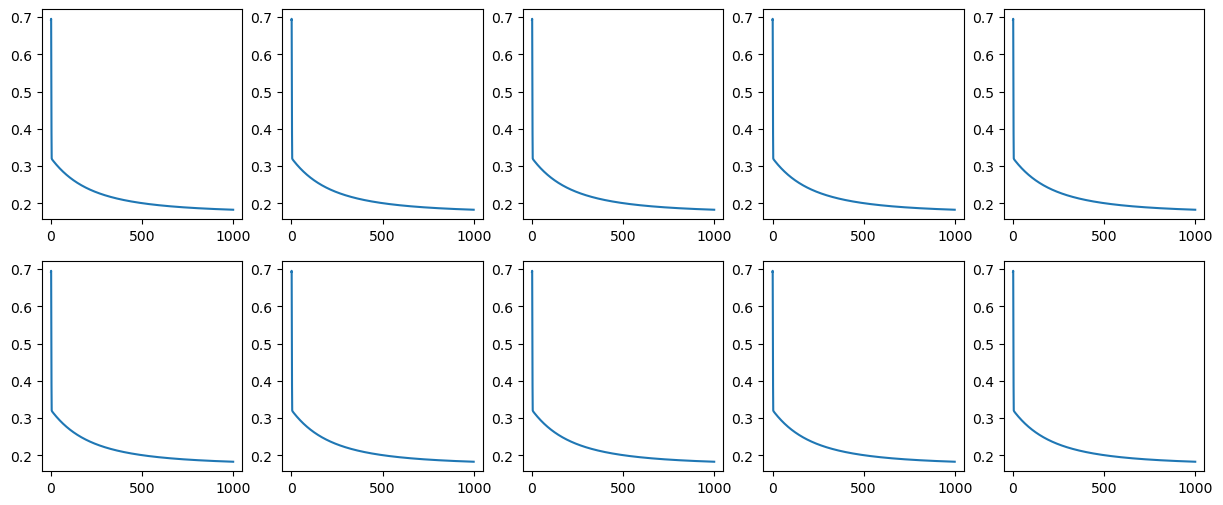

In [28]:
print(learning_rate, " Pred: ", out[-1],"%", sep="")
fig, axes = plt.subplots(math.ceil(c/5), 5, figsize=(15,6))
for i in range(c):
    axes.flat[i].plot(all_J[:len(all_J)//10])


### With sklearn

In [26]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=1000)
X1 = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
y1 = np.argmax(y,axis=1).reshape(y.shape[0]) + 1
print("Test accuracy:", logreg.fit(X1, y1.T).score(X1, y1.T))

Test accuracy: 1.0
